In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Importing Matplotlib for 2D plotting
import matplotlib.pyplot as plt

# Importing Plotly Express for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Importing Seaborn for statistical data visualization
import seaborn as sns


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-2024/vgchartz-2024.csv


In [2]:
df = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

In [3]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [4]:
df.describe(include='all')

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,64016,64016,64016,64016,64016,63999,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000,56965,17879
unique,56177,39798,81,20,3383,8862,NaN,NaN,NaN,NaN,NaN,NaN,7922,1545
top,/games/boxart/default.jpg,Plants vs. Zombies,PC,Misc,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1994-01-01,2018-01-06
freq,7810,17,12617,9304,8842,4435,NaN,NaN,NaN,NaN,NaN,NaN,515,165
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000,NaN,NaN


In [5]:
data_duplicates = df[df.duplicated()]
data_duplicates

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [6]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [7]:
df_unwanted_column = df.drop(columns=['release_date','last_update','img'])
df_unwanted_column

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44
...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
genre_counts = df_unwanted_column['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
fig = px.histogram(genre_counts,x='genre',y='count',color='genre',
                   labels={'genre': 'Genre'}, nbins=10,
                   color_discrete_sequence=['blue', 'orange'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [9]:
console_counts = df_unwanted_column['console'].value_counts().reset_index()
console_counts.columns = ['console', 'count']
fig = px.histogram(console_counts,x='console',y='count',color='console',
                   labels={'console': 'Console'}, nbins=10,width=1300,
                   color_discrete_sequence=['red', 'green'])
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [10]:
df_total_sales = df_unwanted_column.dropna(subset=['total_sales'])
df_total_sales.describe(include='all')

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,18922,18922,18922,18922,18918,4126.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
unique,12992,39,20,739,2867,NaN,NaN,NaN,NaN,NaN,NaN
top,Madden NFL 08,DS,Action,Activision,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,2396,2839,1044,435,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.101890,0.349113,0.264740,0.102281,0.149472,0.043041
std,NaN,NaN,NaN,NaN,NaN,1.439307,0.807462,0.494787,0.168811,0.392653,0.126643
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,6.300000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,7.300000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,NaN,NaN,NaN,NaN,NaN,8.100000,0.340000,0.280000,0.120000,0.140000,0.030000


In [11]:
df_total_sales.genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

In [12]:
data = pd.DataFrame(df_total_sales.loc[:,['genre','total_sales']].groupby('genre').sum().reset_index())
fig =px.bar(data,x='genre',y='total_sales',color='genre',color_continuous_scale=['plasma'],text_auto=True)
fig.update_layout(title_text="Total_sales v/s Genre")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:
data = pd.DataFrame(df_total_sales.loc[:,['console','total_sales']].groupby('console').sum().reset_index())
fig =px.bar(data,x='console',y='total_sales',color='console',color_continuous_scale=['plasma'],text_auto=True)
fig.update_layout(title_text="Total_sales v/s Genre")
fig.update_yaxes(title_text="Total_sales(in millions $)")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
df_na_sales = df_unwanted_column.dropna(subset=['na_sales'])
df_na_sales.describe(include='all')

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,12637,12637,12637,12637,12635,3738.000000,12637.000000,12637.000000,2468.000000,10670.000000,12525.000000
unique,8005,31,20,383,2198,NaN,NaN,NaN,NaN,NaN,NaN
top,Ratatouille,PS2,Action,Activision,EA Canada,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,1571,2122,989,271,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.073221,0.481257,0.264740,0.104838,0.172556,0.050524
std,NaN,NaN,NaN,NaN,NaN,1.434868,0.954483,0.494787,0.178804,0.424050,0.137106
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,6.300000,0.080000,0.050000,0.020000,0.020000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,7.300000,0.200000,0.120000,0.040000,0.050000,0.010000
75%,NaN,NaN,NaN,NaN,NaN,8.100000,0.500000,0.280000,0.120000,0.160000,0.040000


In [15]:
data = pd.DataFrame(df_na_sales.groupby('genre')['na_sales'].sum().reset_index())
fig =go.Figure(data=[go.Pie(labels=data['genre'],values=data['na_sales'],hole=0.2)])
fig.update_layout(title='Total sales in America(in million $)',height = 600, width = 1100, margin=dict(l=0, r=200, b=50, t=50))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

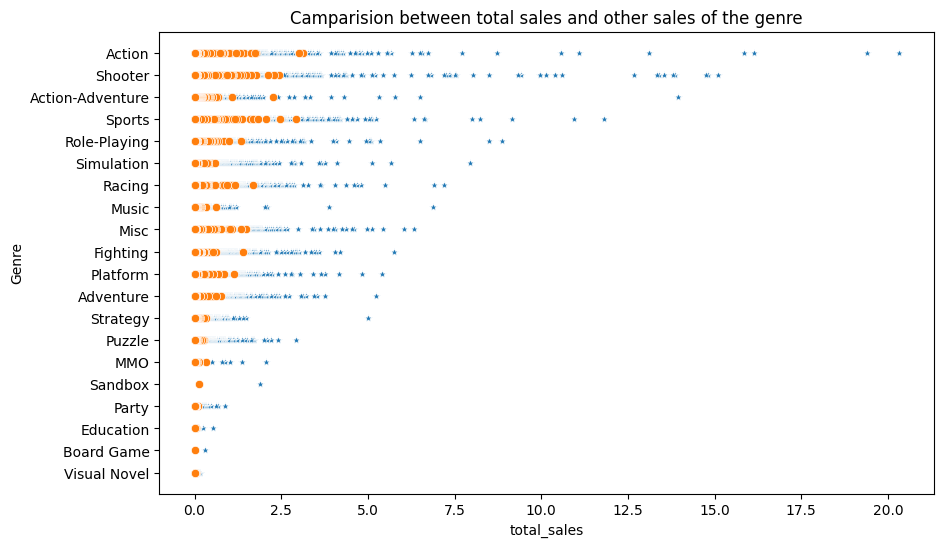

In [16]:
df_other_sales = df_total_sales.dropna(subset=['other_sales'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_other_sales,y='genre',x='total_sales',marker='*')
sns.scatterplot(data=df_other_sales,y='genre',x='other_sales',marker='o')
plt.title('Camparision between total sales and other sales of the genre')
plt.ylabel('Genre')
plt.show()

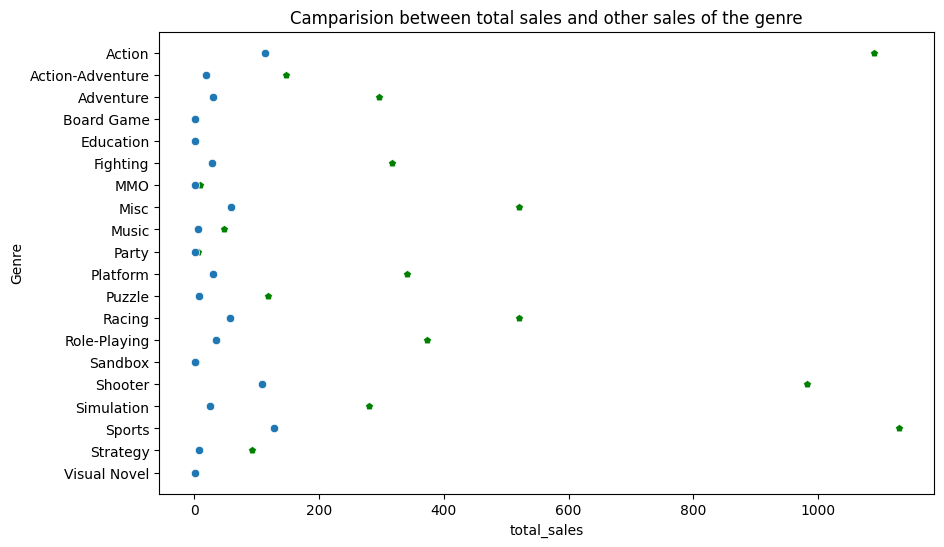

In [17]:
data1 = pd.DataFrame(df_other_sales.loc[:,['genre','total_sales']].groupby('genre').sum().reset_index())
data2 = pd.DataFrame(df_other_sales.loc[:,['genre','other_sales']].groupby('genre').sum().reset_index())
plt.figure(figsize=(10,6))
sns.scatterplot(data=data1,y='genre',x='total_sales',marker='p',c='green')
sns.scatterplot(data=data2,y='genre',x='other_sales',marker='o')
plt.title('Camparision between total sales and other sales of the genre')
plt.ylabel('Genre')
plt.show()

In [18]:
df_japanese_sales = pd.DataFrame(df_unwanted_column.dropna(subset=['jp_sales']))
df_japanese_sales.describe(include='all')


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6726,6726,6726,6726,6726,1402.000000,6726.000000,2468.000000,6726.000000,2367.000000,3112.000000
unique,5668,34,19,388,1083,NaN,NaN,NaN,NaN,NaN,NaN
top,Warriors Orochi 3,DS,Role-Playing,Konami,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,839,989,441,287,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.511555,0.466305,0.487869,0.102281,0.390389,0.102956
std,NaN,NaN,NaN,NaN,NaN,1.201983,1.184801,0.877558,0.168811,0.778153,0.238398
min,NaN,NaN,NaN,NaN,NaN,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,6.800000,0.030000,0.080000,0.020000,0.030000,0.010000
50%,NaN,NaN,NaN,NaN,NaN,7.700000,0.110000,0.190000,0.040000,0.130000,0.030000
75%,NaN,NaN,NaN,NaN,NaN,8.400000,0.390000,0.490000,0.120000,0.400000,0.090000


In [19]:
data = pd.DataFrame(df_japanese_sales.loc[:,['genre','jp_sales']].groupby('genre').sum().reset_index())
fig = px.box(data, x='genre', y='jp_sales', points='all', title='Japanese Sales by Genre',
             color='genre', notched=True, boxmode='overlay', hover_data=['jp_sales'])

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

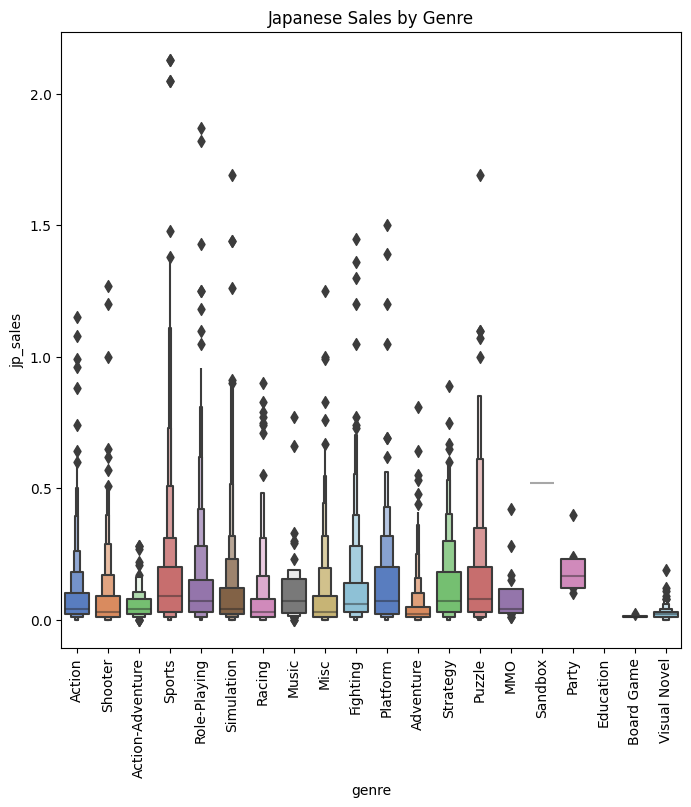

In [20]:
plt.figure(figsize=(8, 8))  # Adjust the height by changing the second value in the tuple
sns.boxenplot(data=df_unwanted_column,x='genre',y='jp_sales',palette="muted")
plt.xticks(rotation=90)
plt.title('Japanese Sales by Genre')
plt.show()

In [21]:
fig =px.bar(data,x='genre',y='jp_sales',color='genre',color_continuous_scale=['plasma'],text_auto=True)
fig.update_layout(title_text="Japanese sales v/s Genre")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

